<a href="https://colab.research.google.com/github/TishaJhabak1014/customer-propensity-modelling-/blob/main/Customer_Propensity_Modelling_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***A propensity model*** is a model that predicts the likelihood that someone will do something. To give a few examples:

- The likelihood that website visitors will register an account.
- The likelihood that a registered user will pay and subscribe.
- The likelihood that a user will refer another user.


Propensity modeling allows us to allocate your resources more wisely, resulting in greater efficiencies while achieving better results. For instance, think of this: instead of sending an email advertisement where there’s a 0%-100% chance of a user clicking it, with propensity modeling, you can target users with a 50%+ chance of clicking it. Fewer emails, more conversions!

To build up on the idea, here's a dataset from a commercial website on the parts of a website users interacted with, depicted in classes of 0 or 1, potential questions are:

- Which of these interactions with the website effect a users likelihood to purchase a product?
- Can we score visitors from yesterday who did not purchase, to see who are the most valuable prospects?


In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
import sklearn.metrics

In [7]:
train_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training_sample.csv')

train_full.head(8)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1
5,b159-6b73a0d6-b159-4728-81a6-914765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
6,7775-6b73b976-7775-4324-b1d9-622031,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
7,4135-6b73ba04-4135-4298-8a12-493138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0


In [8]:
print(train_full.shape)
print(train_full.dtypes)

(455401, 25)
UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown          int64
closed_minibasket_click     int64
checked_delivery_detail     int64
checked_returns_detail      int64
sign_in                     int64
saw_checkout                int64
saw_sizecharts              int64
saw_delivery                int64
saw_account_upgrade         int64
saw_homepage                int64
device_mobile               int64
device_computer             int64
device_tablet               int64
returning_user              int64
loc_uk                      int64
ordered                     int64
dtype: object


In [9]:
print(train_full.describe())

print(train_full.info())

       basket_icon_click  basket_add_list  ...         loc_uk        ordered
count      455401.000000    455401.000000  ...  455401.000000  455401.000000
mean            0.099150         0.074521  ...       0.933224       0.041926
std             0.298864         0.262617  ...       0.249634       0.200420
min             0.000000         0.000000  ...       0.000000       0.000000
25%             0.000000         0.000000  ...       1.000000       0.000000
50%             0.000000         0.000000  ...       1.000000       0.000000
75%             0.000000         0.000000  ...       1.000000       0.000000
max             1.000000         1.000000  ...       1.000000       1.000000

[8 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket

In [11]:
train_full['UserID'].nunique()

455401

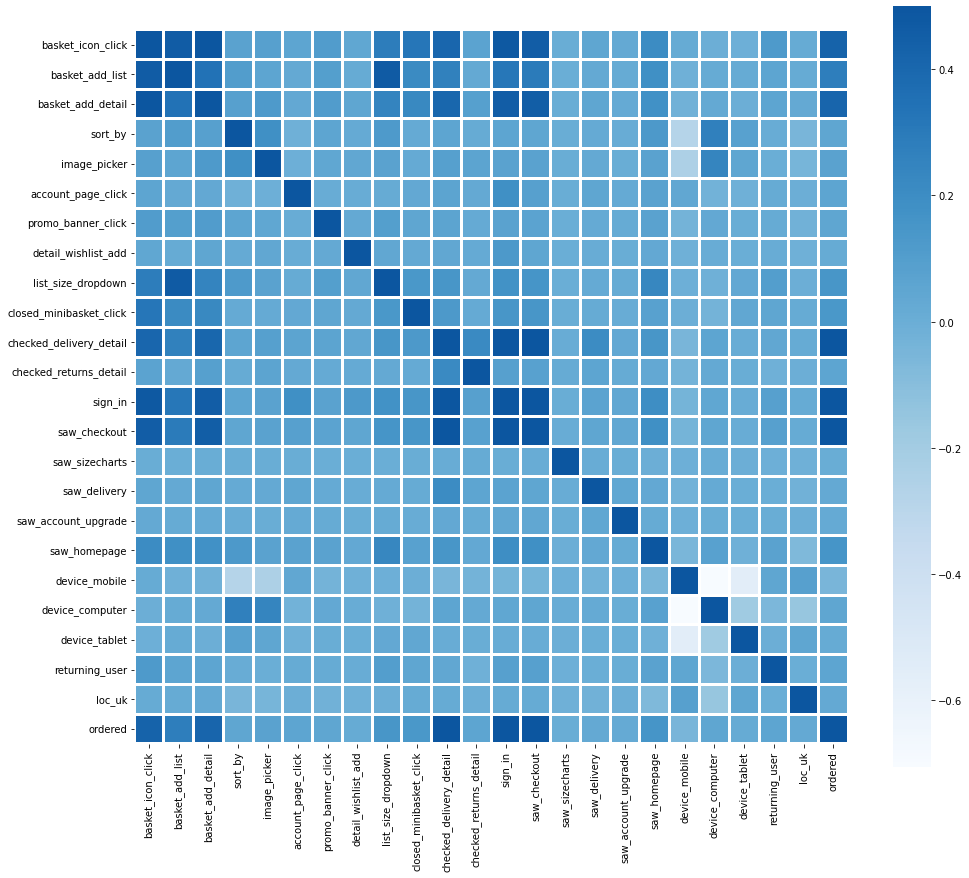

In [17]:
import seaborn as sns
corr = train_full.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [16]:
train_full.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

In [23]:
# Droping columns with low correlation and UserID
predictors = train_full.drop(['UserID','device_mobile'], axis=1)

# seperating the X and y column
predictors = predictors.drop(['ordered'], axis=1)

# predictors = train[['checked_delivery_pdp', 'basket_icon_click', 'sign_in', 'saw_checkout']]
targets = train_full.ordered

In [34]:
predictors

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
455397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
455398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
455399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
print(predictors.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk'],
      dtype='object')


In [45]:
predictors.shape

(455401, 22)

In [26]:
X_train, X_val, y_train, y_val  =   train_test_split(predictors, targets, test_size=.2)

print( "Predictor - Training : ", X_train.shape, "Predictor - Validation : ", X_val.shape )

Predictor - Training :  (364320, 22) Predictor - Validation :  (91081, 22)


In [27]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_val)

#Analyze accuracy of predictions
sklearn.metrics.confusion_matrix(y_val,predictions)

array([[86166,  1027],
       [   54,  3834]])

In [29]:
sklearn.metrics.accuracy_score(y_val, predictions)

0.9881314434404541

In [36]:
testing_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testing_sample.csv')
testing_full

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0


In [37]:
testing_full.shape

(151655, 25)

In [42]:
print(testing_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   basket_icon_click        151655 non-null  int64
 1   basket_add_list          151655 non-null  int64
 2   basket_add_detail        151655 non-null  int64
 3   sort_by                  151655 non-null  int64
 4   image_picker             151655 non-null  int64
 5   account_page_click       151655 non-null  int64
 6   promo_banner_click       151655 non-null  int64
 7   detail_wishlist_add      151655 non-null  int64
 8   list_size_dropdown       151655 non-null  int64
 9   closed_minibasket_click  151655 non-null  int64
 10  checked_delivery_detail  151655 non-null  int64
 11  checked_returns_detail   151655 non-null  int64
 12  sign_in                  151655 non-null  int64
 13  saw_checkout             151655 non-null  int64
 14  saw_sizecharts           151655 non-

In [38]:
testing_full.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [40]:
userids = testing_full.UserID

testing_full = testing_full.drop(['ordered','UserID','device_mobile'], axis=1)

print(testing_full.head(10))

   basket_icon_click  basket_add_list  ...  returning_user  loc_uk
0                  0                0  ...               0       1
1                  0                0  ...               0       1
2                  0                0  ...               0       1
3                  0                0  ...               0       1
4                  0                0  ...               0       1
5                  1                0  ...               1       0
6                  0                0  ...               1       1
7                  0                0  ...               1       1
8                  1                1  ...               1       1
9                  0                0  ...               0       0

[10 rows x 22 columns]


In [43]:
testing_full.shape

(151655, 22)

In [52]:
final_predictions = classifier.predict_proba(testing_full)[:,1]

In [53]:
final_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
testing_full['propensity_probability'] = final_predictions

print(testing_full.head())

   basket_icon_click  basket_add_list  ...  loc_uk  propensity_probability
0                  0                0  ...       1                     0.0
1                  0                0  ...       1                     0.0
2                  0                0  ...       1                     0.0
3                  0                0  ...       1                     0.0
4                  0                0  ...       1                     0.0

[5 rows x 23 columns]


In [60]:
pd.DataFrame(userids)
result_set = pd.concat([userids, testing_full], axis=1)
display(result_set)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity_probability
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0


In [61]:
result_set.to_csv('results.csv')

In [67]:
test_copy = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/testing_sample.csv")
test_prediction_classes = test_copy.ordered
test_copy = test_copy.drop(['ordered','UserID','device_mobile'], axis=1)

In [68]:
predictions_classes = classifier.predict(test_copy)

In [69]:
sklearn.metrics.accuracy_score(test_prediction_classes, predictions_classes)

0.9872671524183179

`The model, based on resonable predictors, seem to predict well, both on validation and test set, the chances a visitor of the website might turn into a customer.`